In [1]:
pip install phik

In [2]:
pip install category_encoders

# <b>1. Introduction</b>  
*Temporary. Subject to be changed*

-------------------
---------------------

## <b>1.1. Business Understanding

###**Business Background**

The hospitality industry is highly competitive, with hotels striving to maintain high occupancy rates and maximize revenue. One of the significant challenges faced by hotel management is the high rate of booking cancellations. Cancellations can disrupt operations, lead to revenue loss, and create inefficiencies in resource allocation.

Understanding the factors leading to cancellations and predicting them accurately can help hotels mitigate these issues. Leveraging machine learning models to forecast cancellations allows hotels to adopt proactive measures, optimize revenue management strategies, and improve overall customer satisfaction.


### **Business Problem**

Revenue Loss: Each cancellation represents a potential revenue loss, as the likelihood of rebooking the canceled room on short notice is low.

### **Objectives**

Mitigate Revenue Loss and Optimized Revenue Management: Proactively manage cancellations to reduce the financial impact because each cancellation represents a potential revenue loss.

**Revenue Loss due to Cancellations**: The amount of revenue lost as a result of canceled bookings. Important for understanding the financial impact.




## <b>1.2. Problem Solving

### **Analytical Approach**

We will do exploratory data analysis to understand the data and some pattern it has.
After that, we will build a classification ML model to predict wether a customer will buy travel insurance or not.

### **Evaluation Metrics**

o	Recall   
o F2 Score



### **Business Metrics**


o	Revenue per room type (RevPAR)  
o Revenue Loss due to Cancellations compared to a baseline period

## <b>1.3. Import Data

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import phik

from scipy.stats import skew, kurtosis, kstest, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder ,KBinsDiscretizer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from collections import defaultdict

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, fbeta_score, roc_auc_score, precision_score, make_scorer
from sklearn.metrics._scorer import _SCORERS

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline

import category_encoders as ce

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [4]:
dfraw = pd.read_csv("data_hotel_booking_demand.csv")
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


| Feature Name | Description |
| --- | --- |
|**country** | Country of origin |
|**market_segment** | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”  |
|**previous_cancellations** | Number of previous bookings that were cancelled by the customer prior to the current booking |
|**booking_changes** | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
|**deposit_type** |  Indication on if the customer made a deposit to guarantee the booking.  |
|**days_in_waiting_list** | Number of days the booking was in the waiting list before it was confirmed to the customer  |
|**customer_type** | Type of booking |
|**reserved_room_type** | Code of room type reserved. Code is presented instead of designation for anonymity reasons|
|**required_car_parking_spaces** | Number of car parking spaces required by the customer |
|**total_of_special_requests** | Number of special requests made by the customer (e.g. twin bed or high floor) |
|**is_canceled** | Value indicating if the booking was canceled (1) or not (0)|  



---



---



# <b>2. Data Understanding and EDA



---



---



## <b>2.1. Data Exploration

In [5]:
dfraw.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [6]:
# Check duplicated rows

print("Total of duplicated rows in this dataset is", dfraw.duplicated().sum())
pct_duplicated = (dfraw.duplicated().sum() / len(dfraw) * 100).round(2)
print("The percentage of duplicated rows is", pct_duplicated)

Total of duplicated rows in this dataset is 73371
The percentage of duplicated rows is 87.79


In [7]:
dfraw[dfraw.duplicated(keep='first')]


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


* We have identified that around 87% (73,371 rows) of the data are duplicates.
High duplication rates can skew the analysis, leading to incorrect insights and conclusions.
For example, if the duplicated rows are not evenly distributed across different classes,it might create a bias towards the more frequent class, affecting the overall analysis and interpretation.

* In the context of machine learning, duplicated rows can also adversely affect model performance.Models trained on data with a high number of duplicates might overfit, meaning the model performs well on the training data but poorly on unseen data. This happens because the model learns the noise in the duplicated data as if it were significant patterns, leading to biased results and poor generalization.  

* To ensure the integrity of our analysis and to improve the performance of our machine learning models, it is crucial to remove these duplicated rows. By dropping duplicates, we aim to achieve a cleaner dataset, which is more representative of the actual distribution of the data. This will help in making more accurate predictions and deriving more reliable insights.  

In [8]:
# Drop duplicated rows

dfraw.drop_duplicates(inplace=True)
dfraw.shape

(10202, 11)

Now we have 10202 rows of data to be analyzed.

In [9]:
# Checking null values

total_null = dfraw.isnull().sum()
percentage_null = (dfraw.isnull().sum() / len(dfraw)) * 100

null_info = pd.DataFrame({
    'Feature': total_null.index,
    'Total Null Values': total_null.values,
    'Percentage Null Values': percentage_null.values
})
null_info

,Feature,Total Null Values,Percentage Null Values
0,country,118,1.156636
1,market_segment,0,0.000000
2,previous_cancellations,0,0.000000
3,booking_changes,0,0.000000
4,deposit_type,0,0.000000
5,days_in_waiting_list,0,0.000000
6,customer_type,0,0.000000
7,reserved_room_type,0,0.000000
8,required_car_parking_spaces,0,0.000000
9,total_of_special_requests,0,0.000000


The missing value rate is 1.15% (118 rows) of the dataset after removed the duplicates. This is the small proportion of the entire dataset so this can be imputed using mode (most frequent) or remove the null values. But before that, we have to analyze first to know whether we should remove this feature instead of imputing.

In [10]:
# Check Descriptive Summary

display(dfraw.describe(),
        dfraw.describe(include='object'))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000
mean,0.089296,0.795040,3.560282,0.167124,0.941188,0.236620
std,0.828474,1.293224,22.196636,0.393812,1.037986,0.425028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,10084,10202,10202,10202,10202
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,1993,4945,9960,6911,4627


## <b>2.2. EDA (Exploratory Data Analysis)

### <b>2.2.1. Categorical Features

#### <b>Market Segment Analysis

In [11]:
# Market Segment Analysis

market_segment_counts = dfraw['market_segment'].value_counts()
market_segment_percentage = (market_segment_counts * 100 / market_segment_counts.sum()).round(2)

# Calculate the counts and percentages for each market segment where is_canceled == 1
canceled_counts = dfraw[dfraw['is_canceled'] == 1]['market_segment'].value_counts()
total_canceled_market = canceled_counts.sum()
canceled_percentage = (canceled_counts * 100 / total_canceled_market).round(2)

df_market_segment = pd.DataFrame({
    'Market Segment': market_segment_counts.index,
    'Total Count': market_segment_counts.values,
    'Percentage (%)': market_segment_percentage.values,
    'Canceled Count': canceled_counts.values,
    'Canceled Percentage (%)': canceled_percentage.reindex(market_segment_counts.index, fill_value=0).values
}).reset_index(drop=True)

df_market_segment

,Market Segment,Total Count,Percentage (%),Canceled Count,Canceled Percentage (%)
0,Online TA,4945,48.47,1534,63.55
1,Direct,2136,20.94,388,16.07
2,Offline TA/TO,1482,14.53,220,9.11
3,Groups,848,8.31,149,6.17
4,Corporate,528,5.18,76,3.15
5,Complementary,181,1.77,29,1.20
6,Aviation,81,0.79,17,0.70
7,Undefined,1,0.01,1,0.04


#### <b>Deposit Type Analysis

In [12]:
# Deposit Type Analysis

deposit_type_counts = dfraw['deposit_type'].value_counts()
deposit_type_percentage = (deposit_type_counts * 100 / deposit_type_counts.sum()).round(2)

# Calculate the counts and percentages for each deposit type where is_canceled == 1
canceled_deposit = dfraw[dfraw['is_canceled'] == 1]['deposit_type'].value_counts()
total_canceled_deposit = canceled_deposit.sum()
canceled_deposit_pct = (canceled_deposit * 100 / total_canceled_deposit).round(2)

df_deposit_type = pd.DataFrame({
    'Deposit Type': deposit_type_counts.index,
    'Total Count': deposit_type_counts.values,
    'Percentage (%)': deposit_type_percentage.values,
    'Canceled Count': canceled_deposit.values,
    'Canceled Percentage (%)': canceled_deposit_pct.reindex(deposit_type_counts.index, fill_value=0).values
}).reset_index(drop=True)

df_deposit_type

,Deposit Type,Total Count,Percentage (%),Canceled Count,Canceled Percentage (%)
0,No Deposit,9960,97.63,2226,92.21
1,Non Refund,195,1.91,174,7.21
2,Refundable,47,0.46,14,0.58


#### <b>Customer Type Analysis

In [13]:
# Customer Type Analysis

customer_type_counts = dfraw['customer_type'].value_counts()
customer_type_percentage = (customer_type_counts * 100 / customer_type_counts.sum()).round(2)

# Calculate the counts and percentages for each customer type where is_canceled == 1
canceled_customer = dfraw[dfraw['is_canceled'] == 1]['customer_type'].value_counts()
total_canceled_customer = canceled_customer.sum()
canceled_customer_pct = (canceled_customer * 100 / total_canceled_customer).round(2)

df_customer_type = pd.DataFrame({
    'Customer Type': customer_type_counts.index,
    'Total Count': customer_type_counts.values,
    'Percentage (%)': customer_type_percentage.values,
    'Canceled Count': canceled_customer.values,
    'Canceled Percentage (%)': canceled_customer_pct.reindex(customer_type_counts.index, fill_value=0).values
}).reset_index(drop=True)

df_customer_type

,Customer Type,Total Count,Percentage (%),Canceled Count,Canceled Percentage (%)
0,Transient,6911,67.74,1987,82.31
1,Transient-Party,2566,25.15,343,14.21
2,Contract,481,4.71,63,2.61
3,Group,244,2.39,21,0.87


#### <b>Reserved Room Type

In [14]:
# Reserved Room Type Analysis

reserved_room_counts = dfraw['reserved_room_type'].value_counts()
reserved_room_percentage = (reserved_room_counts * 100 / reserved_room_counts.sum()).round(2)

# Calculate the counts and percentages for each customer type where is_canceled == 1
canceled_room = dfraw[dfraw['is_canceled'] == 1]['reserved_room_type'].value_counts()
total_canceled_room = canceled_room.sum()
canceled_room_pct = (canceled_room * 100 / total_canceled_room).round(2)

df_reserved_room = pd.DataFrame({
    'Reserved Room Type': reserved_room_counts.index,
    'Total Count': reserved_room_counts.values,
    'Percentage (%)': reserved_room_percentage.values,
    'Canceled Count': canceled_room.values,
    'Canceled Percentage (%)': canceled_room_pct.reindex(reserved_room_counts.index, fill_value=0).values
}).reset_index(drop=True)

df_reserved_room

,Reserved Room Type,Total Count,Percentage (%),Canceled Count,Canceled Percentage (%)
0,A,4627,45.35,1025,42.46
1,D,2042,20.02,498,20.63
2,E,1268,12.43,282,11.68
3,F,720,7.06,188,7.79
4,G,553,5.42,162,5.05
5,B,454,4.45,122,6.71
6,C,340,3.33,81,3.36
7,H,192,1.88,51,2.11
8,P,4,0.04,4,0.17
9,L,2,0.02,1,0.04


**Summary :**

* Based on `market_segment`, `deposit_type`, `customer_type`, and `reserved_room_type` analysis, we know that each value of them have at least 1 canceled booking.
* This analysis indicates that each value might have impact for model to generalize the whole dataset.

#### <b> Country Analysis

In [15]:
# Country Analysis

country_counts = dfraw['country'].value_counts()
country_percentage = (country_counts * 100 / country_counts.sum()).round(2)

# Calculate the counts and percentages for each country where is_canceled == 1
canceled_country = dfraw[dfraw['is_canceled'] == 1]['country'].value_counts()
total_canceled_country = canceled_country.sum()
canceled_country_pct = (canceled_country * 100 / total_canceled_country).reindex(country_counts.index, fill_value=0).round(2)

df_country = pd.DataFrame({
    'Country': country_counts.index,
    'Total Count': country_counts.values,
    'Percentage (%)': country_percentage.values,
    'Canceled Count': canceled_country.reindex(country_counts.index, fill_value=0).values,
    'Canceled Percentage (%)': canceled_country_pct.values
}).reset_index(drop=True)

df_country

,Country,Total Count,Percentage (%),Canceled Count,Canceled Percentage (%)
0,PRT,1993,19.76,732,30.55
1,GBR,734,7.28,120,5.01
2,ESP,641,6.36,122,5.09
3,FRA,612,6.07,100,4.17
4,DEU,432,4.28,72,3.01
...,...,...,...,...,...
157,LCA,1,0.01,0,0.00
158,ZMB,1,0.01,1,0.04
159,GTM,1,0.01,0,0.00
160,UMI,1,0.01,1,0.04


#### <b> Categorical Features Visualization

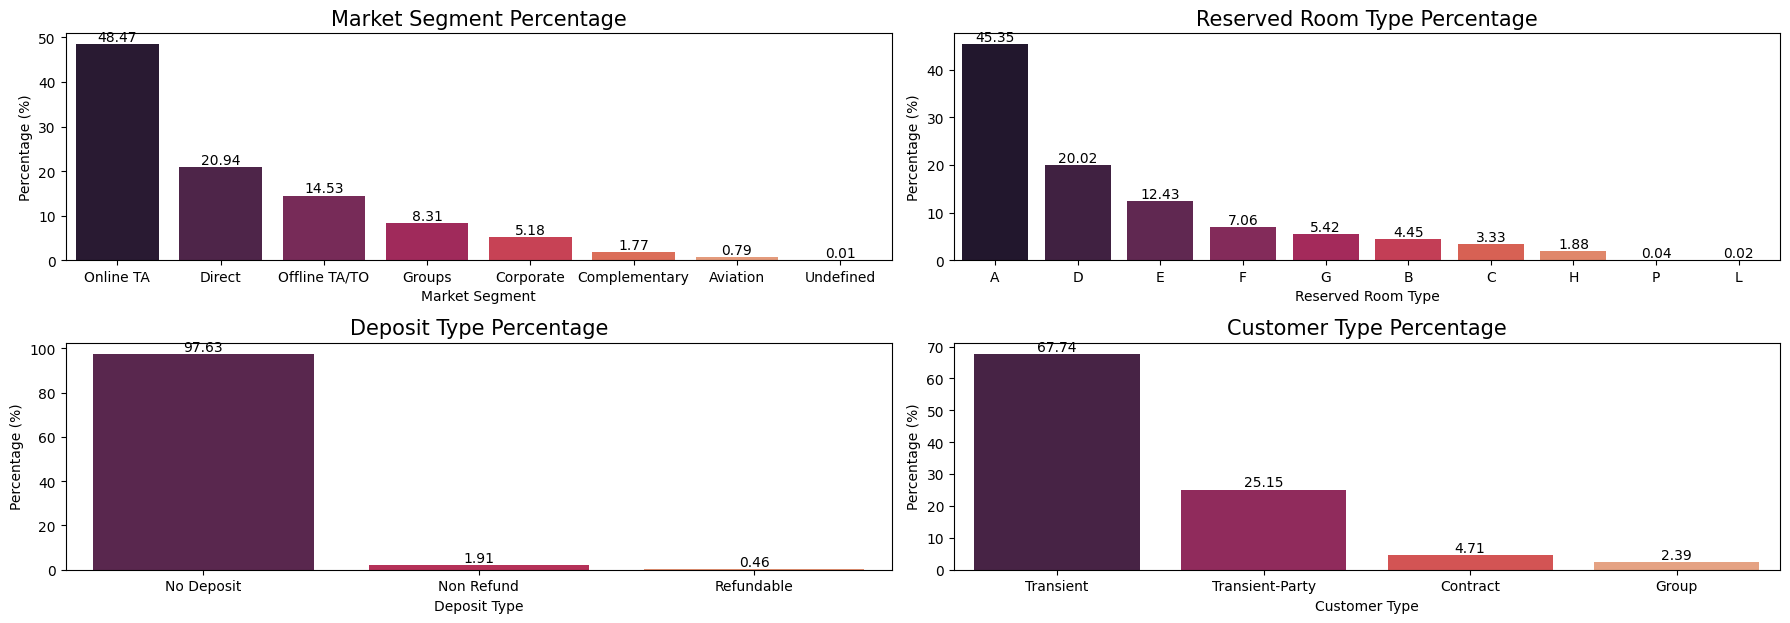

In [16]:
plt.figure(figsize=(18,9))

plt.subplot(3,2,1)
ax = sns.barplot(x='Market Segment',y='Percentage (%)',data=df_market_segment, palette="rocket")
ax.set_title('Market Segment Percentage', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=10)

plt.subplot(3,2,2)
ax = sns.barplot(x='Reserved Room Type',y='Percentage (%)',data=df_reserved_room, palette="rocket")
ax.set_title('Reserved Room Type Percentage', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=10)

plt.subplot(3,2,3)
ax = sns.barplot(x='Deposit Type',y='Percentage (%)',data=df_deposit_type, palette="rocket")
ax.set_title('Deposit Type Percentage', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=10)

plt.subplot(3,2,4)
ax = sns.barplot(x='Customer Type',y='Percentage (%)',data=df_customer_type, palette="rocket")
ax.set_title('Customer Type Percentage', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=10)

plt.tight_layout()
plt.show()

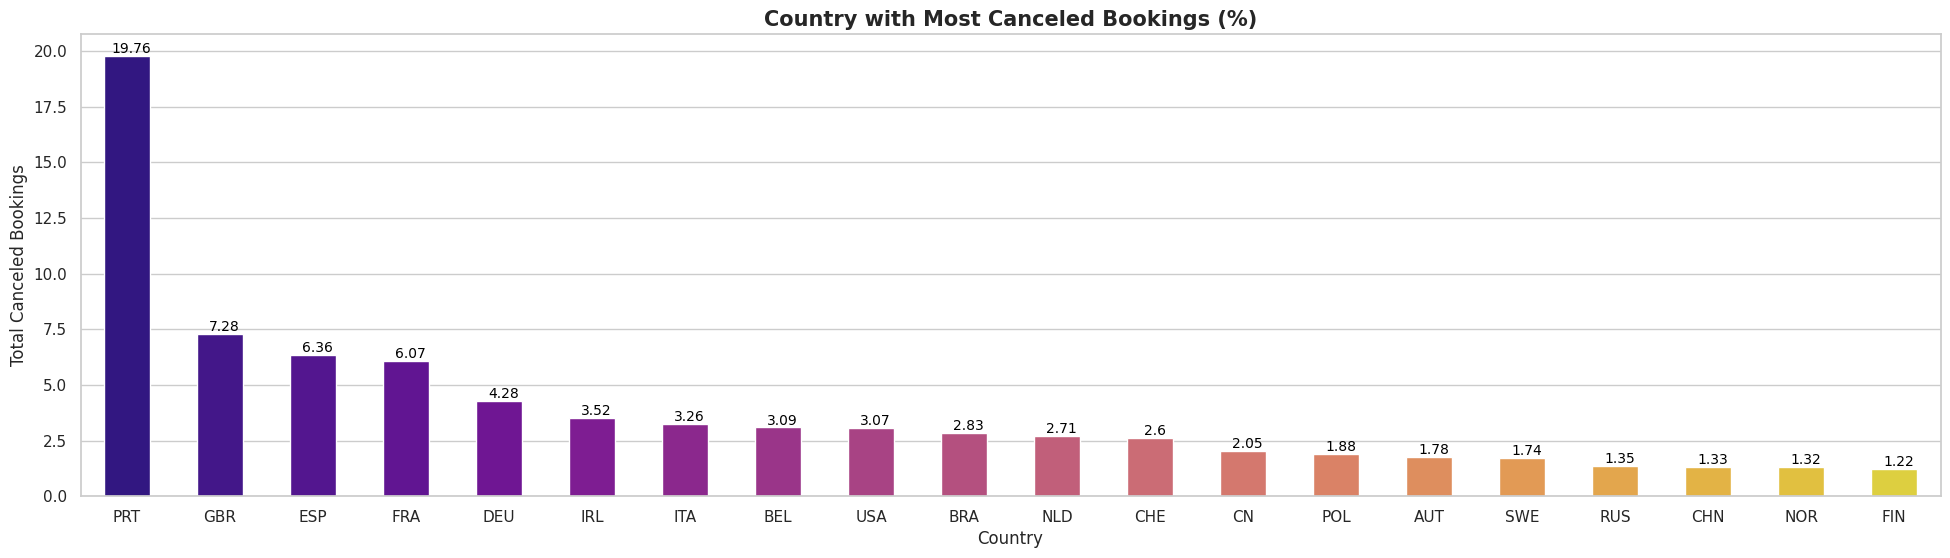

In [17]:
# Checking Distribution of Country

top_country = df_country.head(20)

plt.figure(figsize=(24,6))
sns.set(style='whitegrid')
ax = sns.barplot(data=top_country, x='Country', y='Percentage (%)', width = 0.5, palette='plasma')
ax.set_title('Country with Most Canceled Bookings (%)', fontsize=15, fontweight='bold')
ax.set_xlabel('Country', fontsize=12, fontweight='medium')
ax.set_ylabel('Total Canceled Bookings', fontsize=12, fontweight='medium')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=10)
plt.show()

Based on the bar charts, here are the simple conclusions for each category:

**Market Segment**  
* Online TA (Travel Agencies): Dominates with nearly 48.47% of the market segment.
* Direct bookings: Account for 20.94%.  
* Offline TA/TO (Travel Agents/Tour Operators): Make up 14.53%.  
* Groups: Constitute 8.31%.  
* Other segments like Corporate, Complementary, Aviation, and Undefined have significantly lower percentages.  

**Reserved Room Type**
* Type A: Most common room type, representing 45.35%.
* Type D: Accounts for 20.02%.
* Type E: Has 12.43%.
* Other room types have much lower percentages, with Type L being the least common at 0.02%.

**Deposit Type**
* No Deposit: The vast majority, with 97.63%.
* Non Refund: Accounts for 1.91%.
* Refundable: Is the least common with only 0.46%.

**Customer Type**
* Transient: The largest category at 67.74%.
* Transient-Party: Represents 25.15%.
* Contract: Accounts for 4.71%.
* Group: The smallest segment with 2.39%.

**Country**
* Portugal has a significantly higher cancellation rate compared to other countries, almost three times higher than the second-ranked United Kingdom. It's reasonable since Portugal is the hotel base.   
* European countries dominate the top positions for cancellation rates, indicating a trend or issue specific to this region.
* The United States and Brazil are the notable non-European countries with higher cancellation percentages.  

Overall, the charts show a heavy reliance on **online travel agencies**, a preference for certain room types (especially **room type A**), a significant majority opting for **no deposit**, and a predominant **transient customer** base.

### <b> 2.2.2. Numerical Features

#### <b> Check Distribution of Data

In [18]:
# Select numerical columns
num_columns = dfraw.select_dtypes(include='number').columns.tolist()

# Apply normality tests and calculate skewness and kurtosis
ks_pvalues = [kstest(dfraw[col], 'norm').pvalue for col in num_columns]
shapiro_values = [shapiro(dfraw[col]).pvalue for col in num_columns]
skew_values = [skew(dfraw[col]) for col in num_columns]
kurtosis_values = [kurtosis(dfraw[col]) for col in num_columns]

# Create DataFrame with the results
pd.DataFrame({
    'column': num_columns,
    'skewness': [round(value, 2) for value in skew_values],
    'kurtosis': [round(value, 2) for value in kurtosis_values],
    'ks_pvalue': [round(value, 4) for value in ks_pvalues],
    'sw_pvalue': [round(value, 4) for value in shapiro_values]
})


,column,skewness,kurtosis,ks_pvalue,sw_pvalue
0,previous_cancellations,18.90,448.91,0.0,0.0
1,booking_changes,3.75,30.06,0.0,0.0
2,days_in_waiting_list,8.97,100.97,0.0,0.0
3,required_car_parking_spaces,3.26,32.21,0.0,0.0
4,total_of_special_requests,0.98,0.42,0.0,0.0
5,is_canceled,1.24,-0.46,0.0,0.0


Based on the normality test results and the skewness and kurtosis values, it's clear that none of the numerical features follow a normal distribution (all p-values are 0.0, indicating significant deviations from normality). Additionally, many features exhibit high skewness and kurtosis, suggesting they have extreme values or outliers.

To handle this, we need further analysis and should try some experiments like transformations, binning, robust scaling, or polynomial features.

#### <b> Visualization of Distribution of the Data

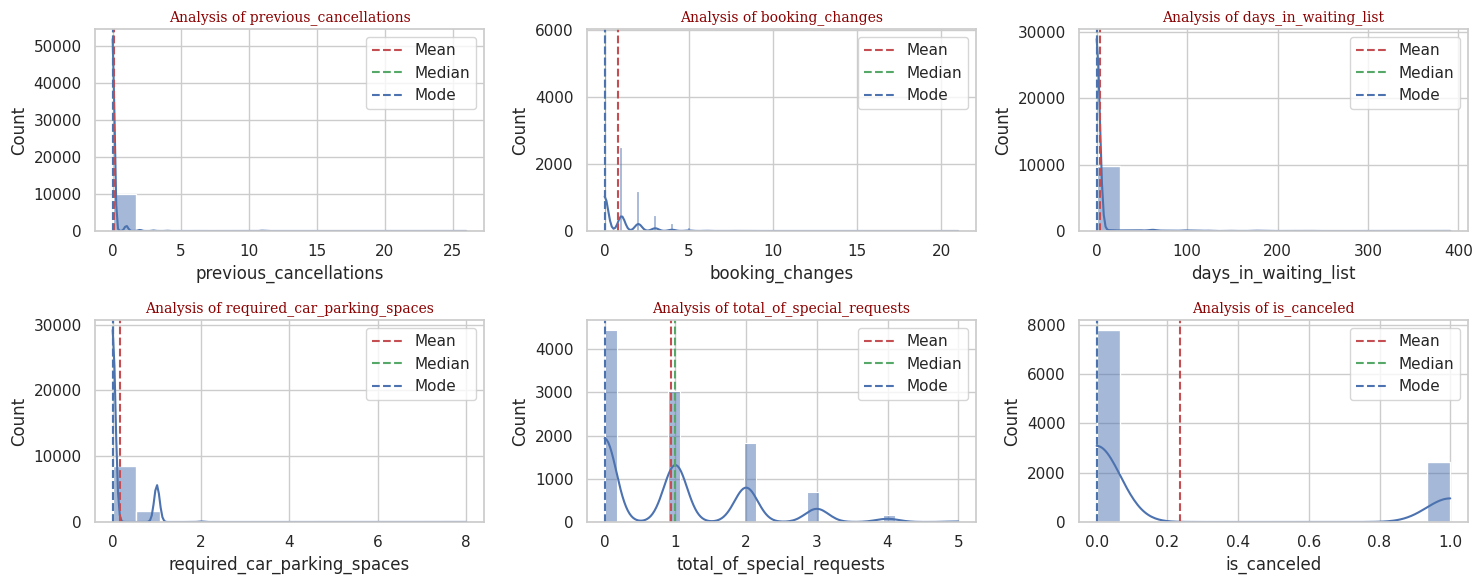

In [19]:
# Plot Distribution for Numerical

def generate_distribution_plot(train_df, continuous_features):
    # create copy of dataframe
    data = train_df[continuous_features].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,6))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.histplot(data[feature],ax=ax, kde=True)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()
    plt.tight_layout()
    plt.show()

generate_distribution_plot(dfraw, num_columns)

**Summary :**

* Most of numerical features are most likely categorical since the range is discrete.
* All of the numerical features are right skewed which means each feature has small counts (exclude the label - `is_canceled`). For example, the most frequent of `required_car_parking_spaces` are 0 and 1, the most frequent of `previous_cancellations` are 0 and 1.
* We need to further check for the value count of each features.

#### <b> Visualization of Outliers

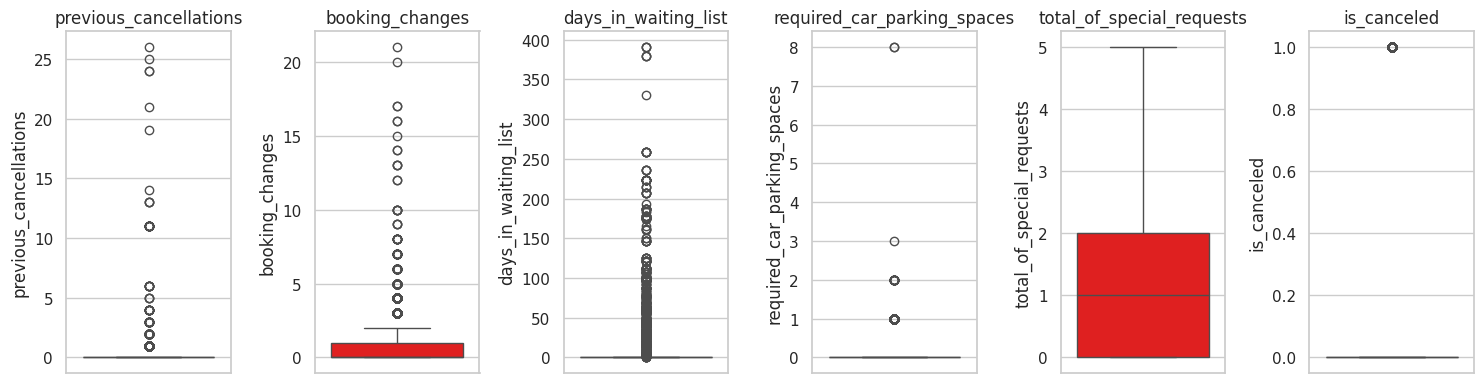

In [20]:
# Cheking Outliers

plt.figure(figsize=(15, 4))
for i in range(0, len(num_columns)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(dfraw[num_columns[i]], color='red', orient='v')
    plt.title(num_columns[i])
    plt.tight_layout()

**Summary :**

* This plot shows the distribution of data more spesifically where we can see outliers of each feature.  
* We may see that outliers for more than 20 `booking_changes`, more than 300 `days_in_waiting_list`, more than 3 `required_car_parking_spaces`, and so on.

#### <b>Previous Cancellations Analysis

In [21]:
# Checking unique values in numerical features
dfraw['previous_cancellations'].value_counts()

previous_cancellations
0     9812
1      267
2       53
3       23
11      16
4       11
6        7
13       3
5        3
24       2
25       1
26       1
14       1
19       1
21       1
Name: count, dtype: int64

In [22]:
dfraw[dfraw['previous_cancellations'] > 11]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
544,PRT,Groups,25,0,Non Refund,0,Transient,A,0,0,1
1618,PRT,Groups,24,0,Non Refund,0,Transient,A,0,0,1
2603,PRT,Offline TA/TO,13,0,No Deposit,31,Transient-Party,A,0,0,1
3279,IRL,Groups,24,0,No Deposit,0,Transient-Party,A,0,0,1
4513,PRT,Offline TA/TO,26,0,Non Refund,0,Transient,A,0,0,1
5267,BEL,Groups,14,0,Non Refund,0,Transient,A,0,0,1
7525,PRT,Offline TA/TO,19,0,Non Refund,0,Transient,A,0,0,1
13984,PRT,Groups,13,0,No Deposit,31,Transient-Party,A,0,0,1
24118,FRA,Direct,13,1,No Deposit,0,Transient,D,0,0,0
65640,PRT,Groups,21,0,No Deposit,0,Transient-Party,A,0,0,1


From the data above, we know that customers who made more than 11 `previous_cancellations` tend to cancel the booking. We may need this data so model know this type of customers and predict more precisely.

#### <b>Required Car Parking Spaces Analysis

In [23]:
dfraw['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    8535
1    1642
2      22
8       2
3       1
Name: count, dtype: int64

In [24]:
dfraw[dfraw['required_car_parking_spaces'] > 2]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
21979,AUT,Direct,0,1,No Deposit,122,Transient-Party,E,8,0,0
26977,ESP,Online TA,0,0,No Deposit,0,Transient-Party,A,3,2,0
35802,AUT,Direct,0,1,No Deposit,0,Transient-Party,E,8,1,0


From the data we know that only 3 customers required more than 2 car parking spaces and all of them are Transient-Party customers. But this type of customer kinda make nonsense because we don't have any information of why they need 3 or 8 car parking spaces and because only 3 customers, the model will not learn much from this data pattern.

We may consider to drop this data.

#### <b> Total of Special Requests Analysis

In [25]:
dfraw['total_of_special_requests'].value_counts()

total_of_special_requests
0    4444
1    3033
2    1829
3     700
4     169
5      27
Name: count, dtype: int64

From the data above, we know that even though the customers made 5 total special requests, they don't cancel the booking. Because we have enough records (27 rows) to know this pattern, this data may help model to generalize and learn this type of customer.

#### <b>Booking Changes Analysis

In [26]:
dfraw['booking_changes'].value_counts()

booking_changes
0     5736
1     2473
2     1169
3      452
4      204
5       80
6       34
7       22
8       10
10       5
9        3
13       3
17       2
12       2
14       2
16       2
21       1
20       1
15       1
Name: count, dtype: int64

In [27]:
dfraw[dfraw['booking_changes'] > 10]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
12621,AUT,Online TA,0,17,No Deposit,0,Transient,A,0,1,0
20247,FRA,Online TA,0,13,No Deposit,0,Transient,E,0,0,0
25029,NLD,Groups,0,12,No Deposit,0,Transient-Party,A,0,0,0
29457,DEU,Corporate,0,14,No Deposit,0,Transient-Party,A,0,1,0
31274,PRT,Corporate,0,21,No Deposit,0,Transient-Party,A,0,0,0
33408,NOR,Online TA,0,14,No Deposit,0,Transient,A,0,2,0
38059,BEL,Groups,0,13,No Deposit,0,Transient-Party,A,0,1,0
44436,GBR,Online TA,0,12,No Deposit,0,Transient,A,0,2,0
45136,NOR,Online TA,0,16,No Deposit,0,Transient,A,0,3,0
51378,IRL,Online TA,0,16,No Deposit,0,Transient,A,0,1,1


From this result, we know that even the customer made more than 10 booking changes, but at the end the didn't cancel the booking. This type of customer may exist in the future so we have to considerate more to remove this data pattern. But, for recommendation, the hotel should have policy of how many changes of customer can be made.

#### <b> Days in Waiting List Analysis

In [28]:
dfraw[dfraw['days_in_waiting_list'] > 250]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
744,FRA,Groups,0,0,No Deposit,259,Transient-Party,A,0,0,0
5970,PRT,Groups,0,0,Non Refund,391,Transient,A,0,0,1
8063,FRA,Groups,0,1,No Deposit,379,Transient-Party,A,0,1,0
10448,FRA,Groups,0,0,No Deposit,330,Transient-Party,A,0,0,0
11062,PRT,Groups,0,0,No Deposit,379,Transient-Party,A,0,0,1
14748,FRA,Groups,0,0,No Deposit,259,Transient-Party,A,0,1,0
21171,FRA,Groups,0,0,No Deposit,379,Transient-Party,A,0,1,0
45296,FRA,Groups,0,1,No Deposit,259,Transient-Party,A,0,0,0
53796,PRT,Groups,0,0,No Deposit,259,Transient-Party,A,0,1,0
58269,PRT,Groups,0,2,Non Refund,391,Transient,A,0,0,1


From the data above, we can group the customers :
* 259 days in waiting list : All of them are Transient-Party customers who booked room A didn't cancel the booking. (6 customers)
* 330 days in waiting list : One of the Transient-Party customer and didn't cancel the booking (1 customer). This is very unique customer and won't help the model to learn this type of customer because only 1.
* 379 days in waiting list : All of them are Transient-Party customers who booked room A, 2 customers didn't cancel the booking and 1 customer canceled the booking. (3 customers)
* 391 days in waiting list : All of them are Transient customers who booked room A and canceled the booking. (3 customers)  

This absolutely tells us the data pattern, but since it only has small amount of whole dataset, the model may not have enough data to learn.

We may consider to remove the customer with more than 250 days in waiting list.

### <b>2.2.3. Hotel Cancellation Analysis

In [29]:
dfraw['is_canceled'].value_counts()

is_canceled
0    7788
1    2414
Name: count, dtype: int64

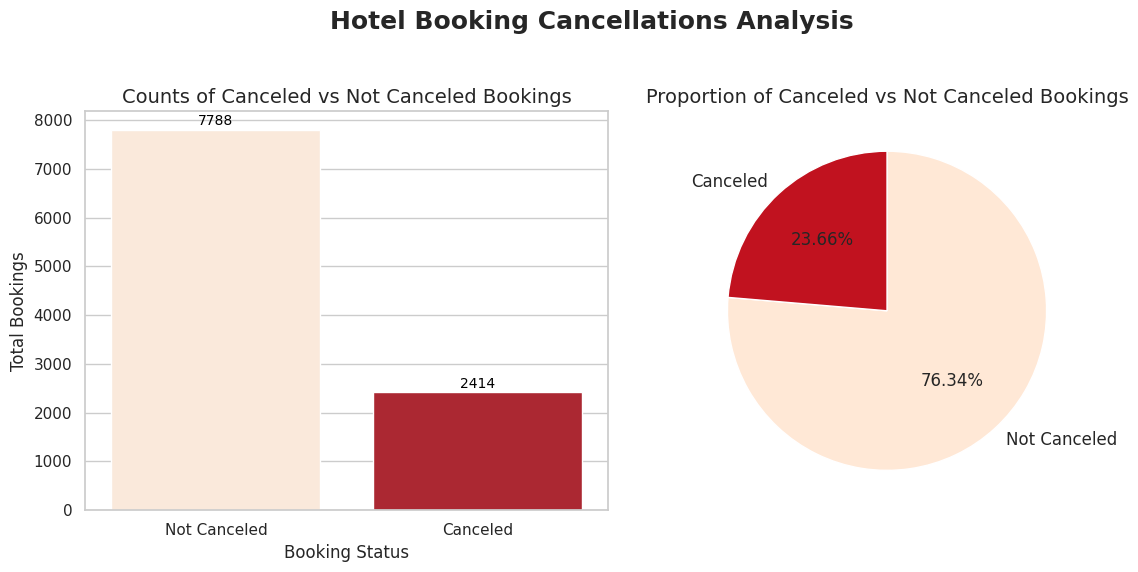

In [30]:
# Visualization
cancel_counts = dfraw['is_canceled'].value_counts()
cancel_rate = dfraw['is_canceled'].mean()

cancel_df = pd.DataFrame({'Count': cancel_counts, 'Category': ['Not Canceled', 'Canceled']})
cancel_df['Proportion'] = cancel_df['Count'] / cancel_df['Count'].sum()

plt.figure(figsize=(12, 6))

# Bar chart for counts
plt.subplot(1, 2, 1)
sns.barplot(x='Category', y='Count', data=cancel_df, palette=['#FFE8D6','#C1121F'])
plt.title('Counts of Canceled vs Not Canceled Bookings', fontsize=14)
plt.ylabel('Total Bookings', fontsize=12)
plt.xlabel('Booking Status', fontsize=12)
for index, value in enumerate(cancel_df['Count']):
    plt.text(index, value + 100, f'{value}', ha='center', fontsize=10, color='black')

# Pie chart for proportions
plt.subplot(1, 2, 2)
plt.pie(cancel_df['Proportion'], labels=cancel_df['Category'], autopct='%1.2f%%', colors=['#FFE8D6','#C1121F'], startangle=90, counterclock=False, textprops={'fontsize': 12})
plt.title('Proportion of Canceled vs Not Canceled Bookings', fontsize=14)

plt.suptitle('Hotel Booking Cancellations Analysis', fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Based on the charts, here are the conclusions:**

**Canceled vs Not Canceled Bookings**
* Not Canceled Bookings: 7,788 bookings were not canceled (make up 76.34% of total bookings).
* Canceled Bookings: 2,414 bookings were canceled (constitute 23.66% of total bookings).

**Key Observations**

* The majority of hotel bookings are not canceled, with over three-quarters (76.34%) of the total bookings being successfully confirmed.
* A significant proportion, nearly one-fourth (23.66%), of bookings are canceled, indicating an area for potential improvement to reduce cancellations.
* These insights can be valuable for identifying areas to improve customer retention and decrease the rate of cancellations.

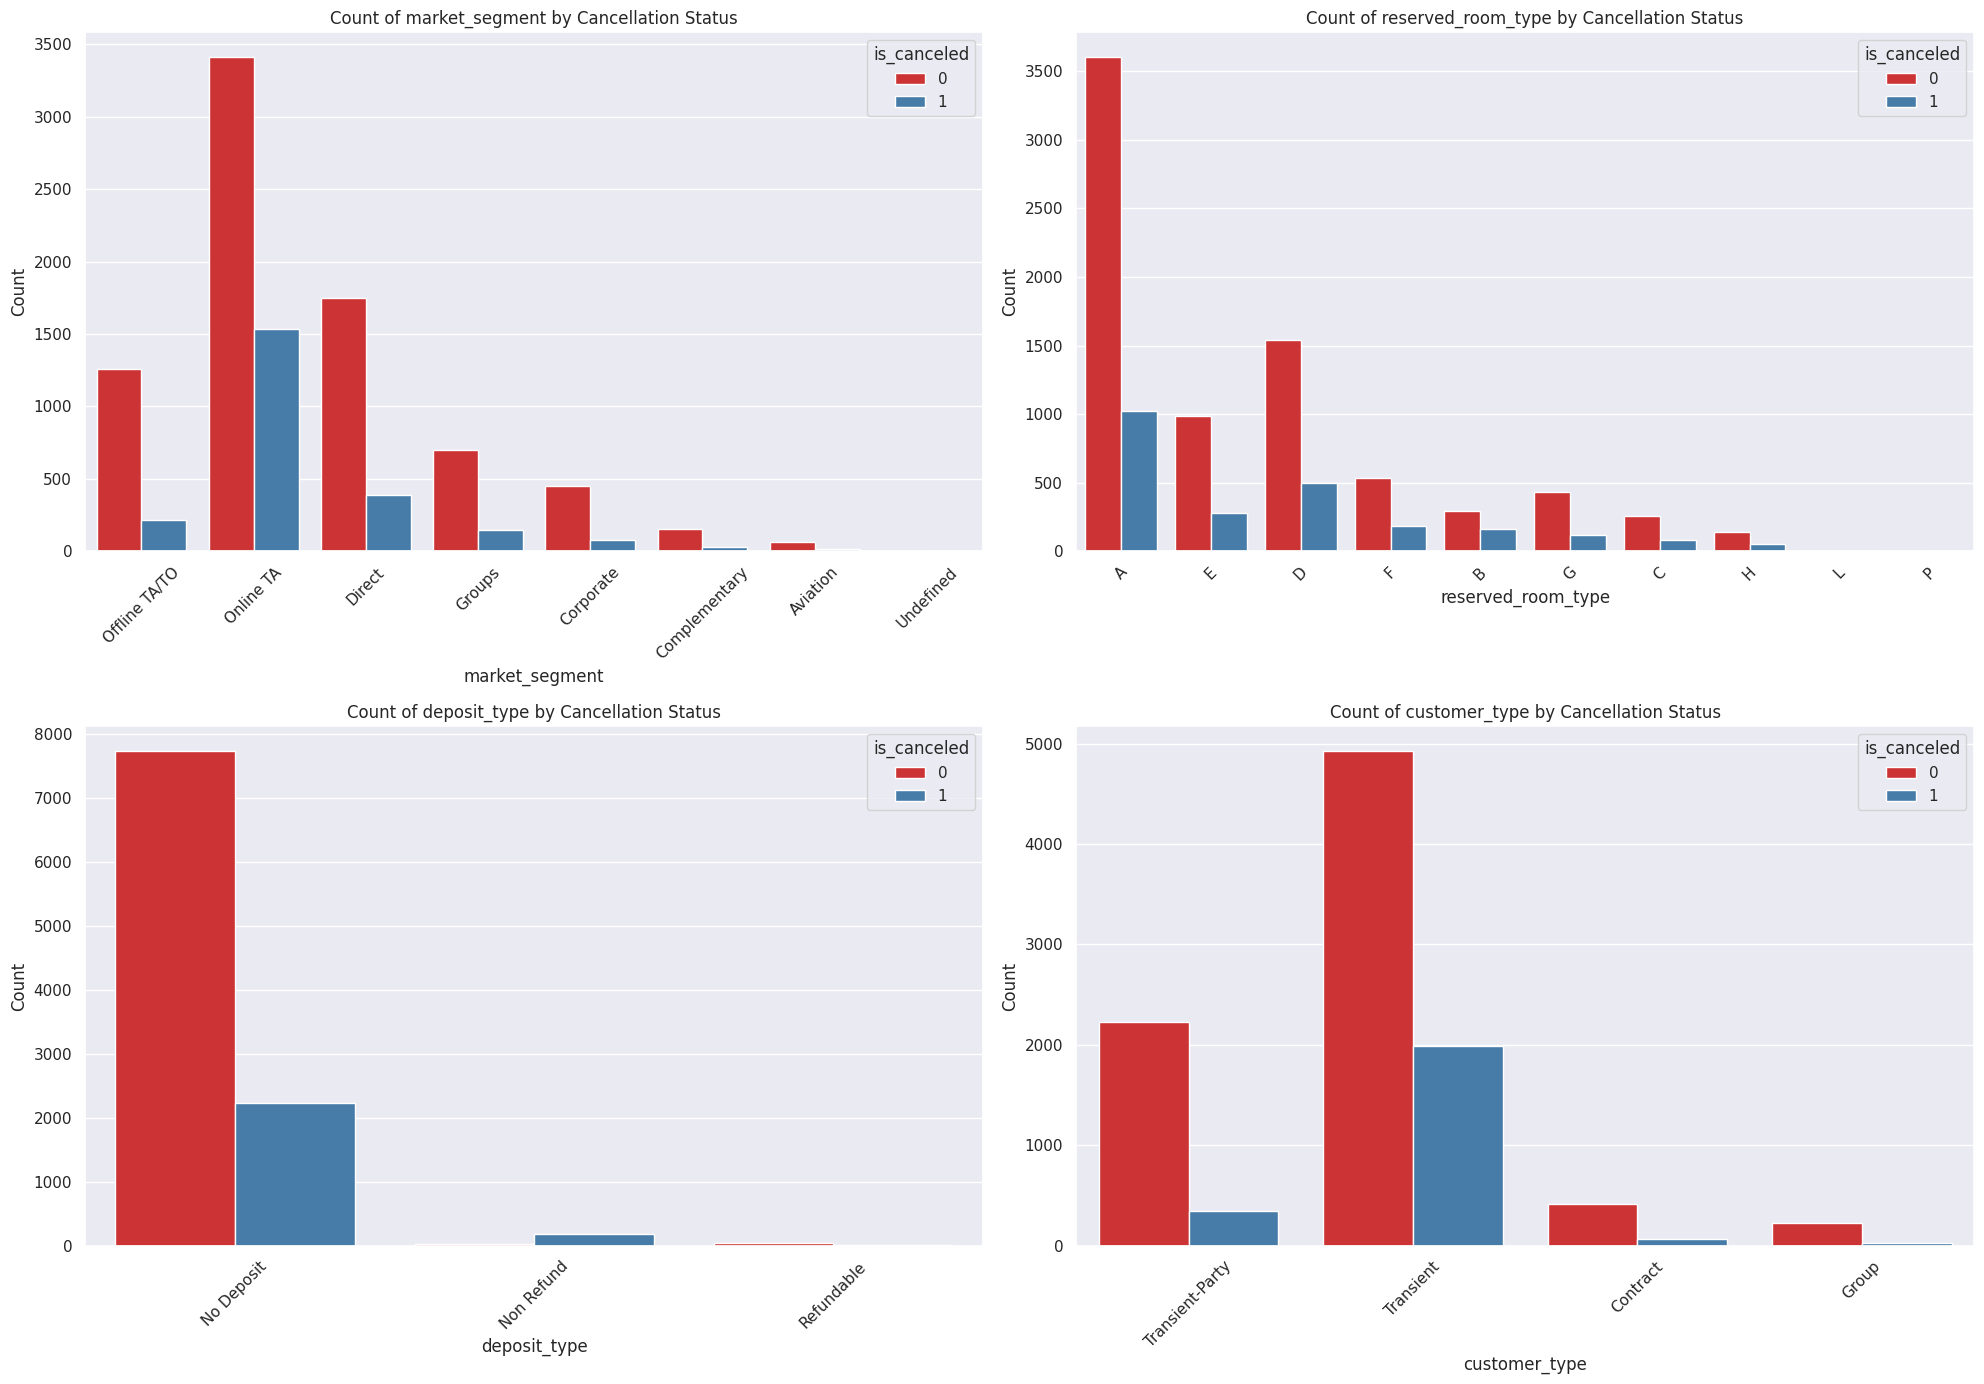

In [31]:
cat_columns = ['market_segment', 'reserved_room_type', 'deposit_type', 'customer_type']

plt.figure(figsize=(20, 14))
sns.set(palette='Set1')
plotnumber = 1

for feature in cat_columns:
    ax = plt.subplot(2, 2, plotnumber)  # Adjust the layout as needed
    sns.countplot(data=dfraw, x=feature, hue='is_canceled')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of {feature} by Cancellation Status')
    plt.xticks(rotation=45)
    plotnumber += 1
    plt.tight_layout()

plt.show()

**Summary :**

* Overall the customers didn't cancel the bookings. But, it's because we have imbalanced dataset where the rate of **non-canceled booking is higher than the canceled bookings**.
* **Online Travel Agencies** (OTA) tend to have a higher cancellation rate compared to other market segments.
* **Direct** bookings are less likely to be canceled.
* **No Deposit** bookings are less likely to be canceled, while **Non Refund** bookings have a higher cancellation rate.
* **Transient** customers are the most common and are less likely to cancel their bookings compared to other customer types.

### <b>2.2.4. Feature Correlation

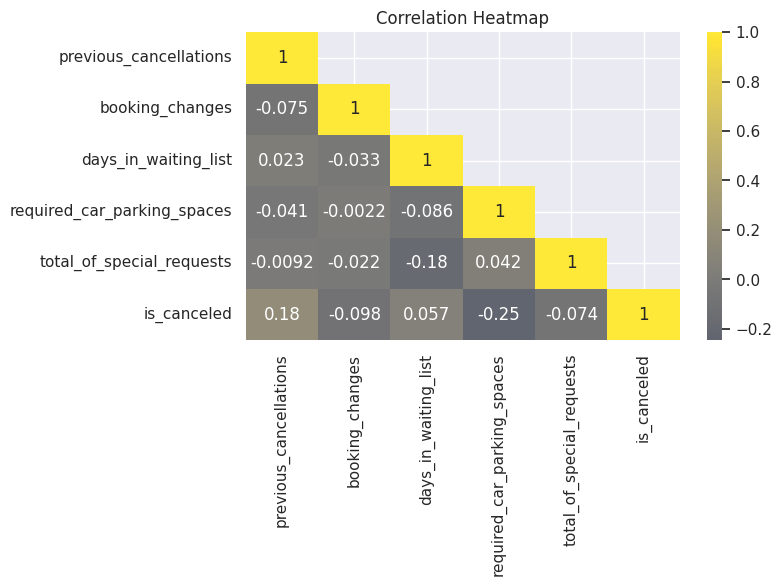

In [32]:
# Correlation Heatmap
corr_matrix = dfraw[num_columns].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, center=0, cmap='cividis', mask=mask)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
dfraw.loc[:,['country','market_segment','deposit_type','customer_type','reserved_room_type','is_canceled']].phik_matrix(interval_cols=['is_canceled'])\
    .style.background_gradient(cmap='cividis')

,country,market_segment,deposit_type,customer_type,reserved_room_type,is_canceled
country,1.000000,0.307185,0.280722,0.100243,0.000000,0.265065
market_segment,0.307185,1.000000,0.289925,0.514269,0.265603,0.225752
deposit_type,0.280722,0.289925,1.000000,0.065981,0.144352,0.130269
customer_type,0.100243,0.514269,0.065981,1.000000,0.227725,0.260902
reserved_room_type,0.000000,0.265603,0.144352,0.227725,1.000000,0.093993
is_canceled,0.265065,0.225752,0.130269,0.260902,0.093993,1.000000


# Data Cleaning

In [34]:
df = dfraw.copy()

In [35]:
# # Handle missing values with mode

# country_mode = df['country'].mode()[0]
# df['country'].fillna(country_mode, inplace=True)
# df.isna().sum()

In [36]:
# Checking Outliers

def outlier_del(df, column_index_or_name, method='summary'):
    if isinstance(column_index_or_name, int):
        column_name = df.columns[column_index_or_name]
        column = df.iloc[:, column_index_or_name]
    else:
        column_name = column_index_or_name
        column = df[column_index_or_name]

    if method == 'summary':
        q1 = column.quantile(0.25)
        q3 = column.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Calculate total outliers and percentage
        outliers = ((column < lower_bound) | (column > upper_bound)).sum()
        total_rows = df.shape[0]
        outlier_percentage = (outliers / total_rows) * 100

        # Print feature name, total outliers, and percentage in one line
        print(f"Feature: {column_name} , Total Outliers: {outliers} , Percentage of Outliers: {outlier_percentage:.2f}%")

        return (lower_bound, upper_bound)
    else:
        return None

In [37]:
# Check the total outliers

for i in range(0, len(num_columns)):
    outlier_del(df, num_columns[i], 'summary')

Feature: previous_cancellations , Total Outliers: 390 , Percentage of Outliers: 3.82%
Feature: booking_changes , Total Outliers: 824 , Percentage of Outliers: 8.08%
Feature: days_in_waiting_list , Total Outliers: 465 , Percentage of Outliers: 4.56%
Feature: required_car_parking_spaces , Total Outliers: 1667 , Percentage of Outliers: 16.34%
Feature: total_of_special_requests , Total Outliers: 0 , Percentage of Outliers: 0.00%
Feature: is_canceled , Total Outliers: 2414 , Percentage of Outliers: 23.66%


If we use IQR to check the outliers, it seems so many otliers in this dataset. But, if we take a look at previous boxplot, we can treat only the extreme values so the data will not be reduced these many.

In [38]:
# Remove extreme outliers

# Remove rows with 'Undefined' in 'market_segment'
df = df[df['market_segment'] != 'Undefined']

# # Remove rows with 'P' and 'L' in 'reserved_room_type'
# df = df[~df['reserved_room_type'].isin(['P', 'L'])]

# # Remove rows with 'required_car_parking_spaces' > 1
# df = df[df['required_car_parking_spaces'] <= 1]

# # Remove rows with 'total_of_special_requests' > 4
# df = df[df['total_of_special_requests'] <= 4]

# # Remove rows with 'booking_changes' > 8
# df = df[df['booking_changes'] <= 8]

# # Remove rows with 'previous_cancellations' having value count less than 20
# previous_cancellations_counts = df['previous_cancellations'].value_counts()
# valid_previous_cancellations = previous_cancellations_counts[previous_cancellations_counts >= 20].index
# df = df[df['previous_cancellations'].isin(valid_previous_cancellations)]

# # Remove rows with 'days_in_waiting_list' > 250
# df = df[df['days_in_waiting_list'] <= 250]

Given that `country` has 162 unique values, we can use encoding techniques suitable for categorical data with many unique values. Two common methods are one-hot encoding and target encoding. One-hot encoding can lead to high-dimensional data, so target encoding might be preferable.  
Except the `country`, all the categorical columns can we treat using One Hot Encoding.

In [39]:
# Drop country
df.drop(['country'], axis=1, inplace=True)

In [40]:
df.duplicated().sum()

7343

In [41]:
df.drop_duplicates(inplace=True)
df.shape

(2858, 10)

# Data Preparation

In [42]:
dfpre = df.copy()

In [43]:
# Split the data

X = dfpre.drop('is_canceled', axis=1)
y = dfpre['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((2286, 9), (572, 9))

In [44]:
dfpre[cat_columns].nunique()

market_segment         7
reserved_room_type    10
deposit_type           3
customer_type          4
dtype: int64

In [45]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['market_segment','deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['reserved_room_type'])
], remainder='passthrough')

In [69]:
# Handle imbalance class
resampling = SMOTE(sampling_strategy='minority', random_state=0) # oversample the minority class
tomek = TomekLinks(sampling_strategy='majority') # undersample the majority class

# Modeling

In [48]:
  KNN_model = KNeighborsClassifier()
  LR_model = LogisticRegression()
  DTC_model = DecisionTreeClassifier()
  RFC_model = RandomForestClassifier()
  XGB_model = XGBClassifier()
  GNB_model = GaussianNB()
  Ada_model = AdaBoostClassifier()
  GBC_model = GradientBoostingClassifier()

**Model Bench Marking - Recall Score**

In [87]:
# Model bench marking
models = [KNN_model, LR_model, DTC_model, RFC_model, XGB_model, GNB_model, Ada_model, GBC_model]

# Evaluation metrics

model_name = []
recall_all = []
recall_mean = []
recall_std = []

# Find the best model
for i in models:
    model_pipeline = ImbPipeline([
        ('Preprocessing', transformer),
        ('SMOTE', resampling),
        ('Tomek', tomek),
        ('Modeling', i)
    ])

    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    model_cv = cross_val_score(model_pipeline, X_train, y_train, cv=stratified_cv, scoring='recall')
    model_name.append(i.__class__.__name__)
    recall_all.append(model_cv.round(4))
    recall_mean.append(model_cv.mean())
    recall_std.append(model_cv.std())

# Show the output

data_train = pd.DataFrame({
    'Model' : model_name,
    'Recall Value' : recall_all,
    'Mean' : recall_mean,
    'Std' : recall_std
})
data_train

,Model,Recall Value,Mean,Std
0,KNeighborsClassifier,"[0.5652, 0.5839, 0.6087, 0.5072, 0.529]",0.558817,0.036632
1,LogisticRegression,"[0.7681, 0.781, 0.7681, 0.7754, 0.7681]",0.772146,0.005251
2,DecisionTreeClassifier,"[0.4275, 0.3431, 0.3768, 0.4348, 0.3841]",0.393251,0.033981
3,RandomForestClassifier,"[0.4493, 0.4307, 0.3841, 0.471, 0.4058]",0.428160,0.030769
4,XGBClassifier,"[0.4275, 0.4599, 0.529, 0.5145, 0.442]",0.474579,0.040106
5,GaussianNB,"[0.9493, 0.9343, 0.9638, 0.9203, 0.8986]",0.933238,0.022633
6,AdaBoostClassifier,"[0.6377, 0.6131, 0.6594, 0.6884, 0.6957]",0.658860,0.030874
7,GradientBoostingClassifier,"[0.5942, 0.6204, 0.6087, 0.6449, 0.6377]",0.621189,0.018549


**Model Bench Marking - F2 Score**

In [88]:
# Model bench marking
models = [KNN_model, LR_model, DTC_model, RFC_model, XGB_model, GNB_model, Ada_model, GBC_model]

# Custom scorer for F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Evaluation metrics

model_name = []
ftwo_all = []
ftwo_mean = []
ftwo_std = []

# Find the best model
for i in models:
    model_pipeline = ImbPipeline([
        ('Preprocessing', transformer),
        ('SMOTE', resampling),
        ('Tomek', tomek),
        ('Modeling', i)
    ])

    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    model_cv = cross_val_score(model_pipeline, X_train, y_train, cv=stratified_cv, scoring=f2_scorer)
    model_name.append(i.__class__.__name__)
    ftwo_all.append(model_cv.round(4))
    ftwo_mean.append(model_cv.mean())
    ftwo_std.append(model_cv.std())

# Show the output

data_train_f2 = pd.DataFrame({
    'Model' : model_name,
    'F2 Value' : ftwo_all,
    'F2 Mean' : ftwo_mean,
    'Std' : ftwo_std
})
data_train_f2

,Model,F2 Value,F2 Mean,Std
0,KNeighborsClassifier,"[0.5152, 0.5442, 0.5563, 0.4755, 0.498]",0.517840,0.029549
1,LogisticRegression,"[0.6892, 0.723, 0.7143, 0.7021, 0.7114]",0.707995,0.011518
2,DecisionTreeClassifier,"[0.4058, 0.3466, 0.3909, 0.4605, 0.3979]",0.400337,0.036429
3,RandomForestClassifier,"[0.4441, 0.4288, 0.4228, 0.4806, 0.408]",0.436879,0.024749
4,XGBClassifier,"[0.439, 0.4709, 0.5352, 0.5175, 0.46]",0.484511,0.036096
5,GaussianNB,"[0.7368, 0.7512, 0.7644, 0.7324, 0.7209]",0.741133,0.015125
6,AdaBoostClassifier,"[0.6197, 0.6069, 0.6481, 0.669, 0.678]",0.644357,0.027420
7,GradientBoostingClassifier,"[0.5942, 0.6195, 0.6069, 0.6421, 0.634]",0.619363,0.017438


From the result for data training, it shows that the models are stable. From the result using metric Recall and F2, the Gaussian Naive Bayes and Logistic Regression shows the best result. Meanwhile, the rest models show bad result and have a huge difference compared to Naive Bayes and Logistic Regression.

## First Experiment
Original model. Evaluate the model.

In [89]:
# Function to create pipeline
def create_pipeline(transformer, model):
    return ImbPipeline([
        ('Preprocessing', transformer),
        ('SMOTE', resampling),
        ('Tomek', tomek),
        ('Modeling', model)
    ])

# Function to evaluate models
def evaluate_model(xtrain, xtest, ytrain, ytest, models, transformer):
    result = defaultdict(list)

    for model_name, model in models:
        pipeline = create_pipeline(transformer, model)
        pipeline.fit(xtrain, ytrain)
        ypred = pipeline.predict(xtest)

        # Compute probabilities for ROC AUC if the model supports it
        if hasattr(model, "predict_proba"):
            yprob = pipeline.predict_proba(xtest)[:, 1]
        else:
            yprob = ypred

        accuracy = accuracy_score(ytest, ypred)
        recall = recall_score(ytest, ypred)
        precision = precision_score(ytest, ypred)
        f1score = f1_score(ytest, ypred)
        f2score = fbeta_score(ytest, ypred, beta=2)
        roc_auc = roc_auc_score(ytest, ypred)

        result['Model'].append(model_name)
        result['Accuracy'].append(accuracy)
        result['Recall'].append(recall)
        result['Precision'].append(precision)
        result['F1 Score'].append(f1score)
        result['F2 Score'].append(f2score)
        result['ROC AUC Score'].append(roc_auc)

    return result

In [90]:
my_models = [('KNN Classifier', KNeighborsClassifier()),
 ('Logistic Regression', LogisticRegression()),
  ('Decision Tree Classifier', DecisionTreeClassifier()),
   ('Random Forest Classifier', RandomForestClassifier()),
    ('XGBoost Classifier', XGBClassifier()),
     ('Gaussian Naive Bayes', GaussianNB()),
      ('Ada Boost Classifier', AdaBoostClassifier()),
       ('Gradient Boosting Classifier', GradientBoostingClassifier())]

In [91]:
# Experiment 1
print("First Experiment")

result1 = evaluate_model(X_train, X_test, y_train, y_test, my_models, transformer)
result1_df = pd.DataFrame(result1)
result1_df

First Experiment


,Model,Accuracy,Recall,Precision,F1 Score,F2 Score,ROC AUC Score
0,KNN Classifier,0.617133,0.526012,0.399123,0.453865,0.494565,0.591327
1,Logistic Regression,0.727273,0.739884,0.535565,0.621359,0.687433,0.730844
2,Decision Tree Classifier,0.639860,0.323699,0.386207,0.352201,0.334528,0.550321
3,Random Forest Classifier,0.666084,0.375723,0.439189,0.404984,0.386905,0.583851
4,XGBoost Classifier,0.716783,0.462428,0.536913,0.496894,0.475624,0.644748
5,Gaussian Naive Bayes,0.538462,0.890173,0.385965,0.538462,0.705775,0.638069
6,Ada Boost Classifier,0.750000,0.624277,0.580645,0.601671,0.615034,0.714394
7,Gradient Boosting Classifier,0.758741,0.578035,0.606061,0.591716,0.583431,0.707564


In [92]:
transformer.get_feature_names_out()

array(['onehot__market_segment_Complementary',
       'onehot__market_segment_Corporate',
       'onehot__market_segment_Direct', 'onehot__market_segment_Groups',
       'onehot__market_segment_Offline TA/TO',
       'onehot__market_segment_Online TA',
       'onehot__deposit_type_Non Refund',
       'onehot__deposit_type_Refundable', 'onehot__customer_type_Group',
       'onehot__customer_type_Transient',
       'onehot__customer_type_Transient-Party',
       'binary__reserved_room_type_0', 'binary__reserved_room_type_1',
       'binary__reserved_room_type_2', 'binary__reserved_room_type_3',
       'remainder__previous_cancellations', 'remainder__booking_changes',
       'remainder__days_in_waiting_list',
       'remainder__required_car_parking_spaces',
       'remainder__total_of_special_requests'], dtype=object)

In [58]:
# # Combine train and test scores based on the 'model' column
# combined_scores = result1_df[['Model', 'F2 Score']].set_index('Model').join(
#     data_train_f2[['Model', 'F2 Mean']].set_index('Model')
# )

# # Calculate the absolute difference between train and test F2 scores
# combined_scores['f2_diff'] = (combined_scores['F2 Score'] - combined_scores['F2 Mean']).abs()

# sorted_scores = combined_scores.sort_values(by='F2 Score', ascending=False)
# sorted_scores.reset_index(inplace=True)
# sorted_scores

After evaluate the model, there's no indication that the model are overfitting. The best models are Naive Bayes and Logistic Regression, followed by Ada Boost Classifier and Gradient Boosting Classifier.

## Second Experiment

Using robust scaler, minmaxscaler, standardscaler, hypeparam logistic regression

In [93]:
transformer2 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['market_segment','deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['reserved_room_type']),
    ('scaler', RobustScaler(), ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces'])
], remainder='passthrough')

In [94]:
# Experiment 2
print("Second Experiment")

result2 = evaluate_model(X_train, X_test, y_train, y_test, my_models, transformer2)
result2_df = pd.DataFrame(result2)
result2_df

Second Experiment


,Model,Accuracy,Recall,Precision,F1 Score,F2 Score,ROC AUC Score
0,KNN Classifier,0.624126,0.647399,0.421053,0.510251,0.584551,0.630717
1,Logistic Regression,0.730769,0.751445,0.539419,0.628019,0.696677,0.736625
2,Decision Tree Classifier,0.632867,0.312139,0.372414,0.339623,0.322581,0.542034
3,Random Forest Classifier,0.660839,0.387283,0.432258,0.408537,0.395514,0.583366
4,XGBoost Classifier,0.711538,0.456647,0.526667,0.489164,0.469121,0.639351
5,Gaussian Naive Bayes,0.536713,0.890173,0.385000,0.537522,0.705128,0.636816
6,Ada Boost Classifier,0.753497,0.601156,0.590909,0.595989,0.599078,0.710352
7,Gradient Boosting Classifier,0.763986,0.624277,0.606742,0.615385,0.620690,0.724419


From the second experiment, some models show the improvement, especially for Logistic Regression. Meanwhile the Naive Bayes doesn't improve and Ada Boost & Gradient Boosting have slighly difference performance from original model.

## Third Experiment

Using KBinsDiscretizer to handle outliers.

In [95]:
features_to_bin = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

transformer3 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['market_segment','deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['reserved_room_type']),
    ('binning', KBinsDiscretizer(n_bins=30), features_to_bin)
], remainder='passthrough')

In [96]:
# Experiment 3
print("Third Experiment")

result3 = evaluate_model(X_train, X_test, y_train, y_test, my_models, transformer3)
result3_df = pd.DataFrame(result3)
result3_df

Third Experiment


,Model,Accuracy,Recall,Precision,F1 Score,F2 Score,ROC AUC Score
0,KNN Classifier,0.669580,0.653179,0.466942,0.544578,0.604925,0.664935
1,Logistic Regression,0.744755,0.705202,0.562212,0.625641,0.671067,0.733554
2,Decision Tree Classifier,0.648601,0.306358,0.395522,0.345277,0.320823,0.551675
3,Random Forest Classifier,0.666084,0.369942,0.438356,0.401254,0.381862,0.582214
4,XGBoost Classifier,0.709790,0.439306,0.524138,0.477987,0.454002,0.633187
5,Gaussian Naive Bayes,0.559441,0.965318,0.404358,0.569966,0.755656,0.674388
6,Ada Boost Classifier,0.753497,0.630058,0.586022,0.607242,0.620729,0.718538
7,Gradient Boosting Classifier,0.750000,0.606936,0.583333,0.594901,0.602064,0.709483


From the result above, Logistic Regression shows the decreasing from original model (0.68 to 0.67). Meanwhile, Naive Bayes shows the improvement from original model (0.70 to 0.75). Ada Boost, Gradient Boosting Classfier, and KNN show the improvement. It indicates that binning is a good experiment and treatment.

## 4. Fourth Experiment

Using Polynomial Features

In [101]:
transformer4 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['market_segment','deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['reserved_room_type']),
    ('poly', PolynomialFeatures(degree=2, include_bias=False), ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces'])
], remainder='passthrough')

In [102]:
# Experiment 4
print("Fourth Experiment")

result4 = evaluate_model(X_train, X_test, y_train, y_test, my_models, transformer4)
result4_df = pd.DataFrame(result4)
result4_df

Fourth Experiment


,Model,Accuracy,Recall,Precision,F1 Score,F2 Score,ROC AUC Score
0,KNN Classifier,0.580420,0.520231,0.364372,0.428571,0.479233,0.563374
1,Logistic Regression,0.751748,0.531792,0.601307,0.564417,0.544379,0.689455
2,Decision Tree Classifier,0.632867,0.329480,0.377483,0.351852,0.338078,0.546945
3,Random Forest Classifier,0.646853,0.358382,0.405229,0.380368,0.366864,0.565156
4,XGBoost Classifier,0.711538,0.462428,0.526316,0.492308,0.473934,0.640988
5,Gaussian Naive Bayes,0.594406,0.907514,0.420912,0.575092,0.737089,0.683081
6,Ada Boost Classifier,0.736014,0.653179,0.553922,0.599469,0.630580,0.712555
7,Gradient Boosting Classifier,0.743007,0.612717,0.569892,0.590529,0.603645,0.706108


This experiment using Polynomial Features shows good improvement for Naive Bayes from original model (0.70 to 0.73), Ada Boost (0.61 to 0.63), Gradient Boosting Classifier (from 0.58 to 0.60), but really bad improvement for Logistic Regression.

## Fifth Experiment

In [106]:
transformer5 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['market_segment','deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['reserved_room_type']),
    ('binning', KBinsDiscretizer(n_bins=30), features_to_bin),
    ('poly', PolynomialFeatures(), ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces'])
], remainder='passthrough')

In [107]:
# Experiment 5
print("Fifth Experiment")

result5 = evaluate_model(X_train, X_test, y_train, y_test, my_models, transformer5)
result5_df = pd.DataFrame(result5)
result5_df

Fifth Experiment


,Model,Accuracy,Recall,Precision,F1 Score,F2 Score,ROC AUC Score
0,KNN Classifier,0.599650,0.612717,0.395522,0.480726,0.552083,0.603351
1,Logistic Regression,0.664336,0.820809,0.468647,0.596639,0.713568,0.708650
2,Decision Tree Classifier,0.625874,0.294798,0.356643,0.322785,0.305389,0.532111
3,Random Forest Classifier,0.653846,0.364162,0.417219,0.388889,0.373665,0.571805
4,XGBoost Classifier,0.708042,0.439306,0.520548,0.476489,0.453461,0.631934
5,Gaussian Naive Bayes,0.580420,0.913295,0.412533,0.568345,0.734884,0.674693
6,Ada Boost Classifier,0.762238,0.653179,0.597884,0.624309,0.641317,0.731352
7,Gradient Boosting Classifier,0.755245,0.641618,0.587302,0.613260,0.629966,0.723065


From this experiment, the Naive Bayes has F2 score 0.73 which lower than experiment 3. But, Logistic Regression, Ada Boost, and Gradient Boosting show best performance so far.

## Sixth Experiment

Using Voting Classifier and transformer 3.

In [170]:
# Create a Voting Classifier
my_clfs = [
    ('log_reg', LogisticRegression(class_weight='balanced', C=0.1, random_state=0)),
    ('gaussian_nb', GaussianNB()),
    ('adaboost', AdaBoostClassifier(random_state=42)),
    ('gbc', GradientBoostingClassifier(random_state=42))]
voting_clf = VotingClassifier(estimators=my_clfs, voting='soft')

# Define a pipeline with the Voting Classifier
voting_pipeline = ImbPipeline([
    ('Preprocessing', transformer3),
    ('SMOTE', SMOTE()),
    ('Tomek', TomekLinks()),
    ('Modeling', voting_clf)
])

voting_pipeline.fit(X_train, y_train)
y_pred_voting = voting_pipeline.predict(X_test)

# Evaluate the performance
accuracy_voting = accuracy_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
f1_score_voting = f1_score(y_test, y_pred_voting)
f2_score_voting = fbeta_score(y_test, y_pred_voting, beta=2)
roc_auc_voting = roc_auc_score(y_test, y_pred_voting)

print(f"Voting Classifier F2 Score: {f2_score_voting}")
print(f"Voting Classifier Recall: {recall_voting}")

Voting Classifier F2 Score: 0.7652582159624414
Voting Classifier Recall: 0.9421965317919075


## Seventh Experiment

Using Stacking Classifier and transformer 3.

In [174]:
my_clfs = [
    ('log_reg', LogisticRegression(class_weight='balanced', C=0.1, random_state=0)),
    ('gaussian_nb', GaussianNB()),
    ('adaboost', AdaBoostClassifier(random_state=0)),
    ('gbc', GradientBoostingClassifier(random_state=0))]
meta_model = GaussianNB()

# Create a Stacking Classifier
stacking_clf = StackingClassifier(estimators=my_clfs, final_estimator=meta_model, cv=5)

# Define a pipeline with the Stacking Classifier
stacking_pipeline = ImbPipeline([
    ('Preprocessing', transformer3),
    ('SMOTE', SMOTE()),
    ('Tomek', TomekLinks()),
    ('Modeling', stacking_clf)
])

stacking_pipeline.fit(X_train, y_train)
y_pred_stacking = stacking_pipeline.predict(X_test)

# Evaluate the performance
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
f1_score_stacking = f1_score(y_test, y_pred_stacking)
f2_score_stacking = fbeta_score(y_test, y_pred_stacking, beta=2)
roc_auc_stacking = roc_auc_score(y_test, y_pred_stacking)

print(f"Stacking Classifier F2 Score: {f2_score_stacking}")
print(f"Stacking Classifier Recall: {recall_stacking}")

Stacking Classifier F2 Score: 0.7666015625000001
Stacking Classifier Recall: 0.9075144508670521


#########################################################################

# Coretan

We assume Positive class is 1 (canceled).
We're going to use recall metrics scoring. Hotel need to minimize False Negative where we predict customer will not cancel booking (0), but actually cancel(1) the booking. This will make disadvantages because hotel may allocate the effort and expenses to another visitors that will not cancel booking.

Try :   
NearMiss(version=3)  => not improve much, tends to decresase  
VotingClassifier and StackingClassifier (have to explain what does it mean to business)
Remove considered outliers (car_required_parking_spaces > 2, days_in_waiting_list > 250)
Ordinal encoder : reserved_room_type, market_segment